In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

In [7]:
Engine_size = np.array([1.0 , 1.5 , 2.0 , 2.2 , 2.8 ,3.0])
Price = np.array([15 , 18 , 22 , 24 , 27 , 30 ])

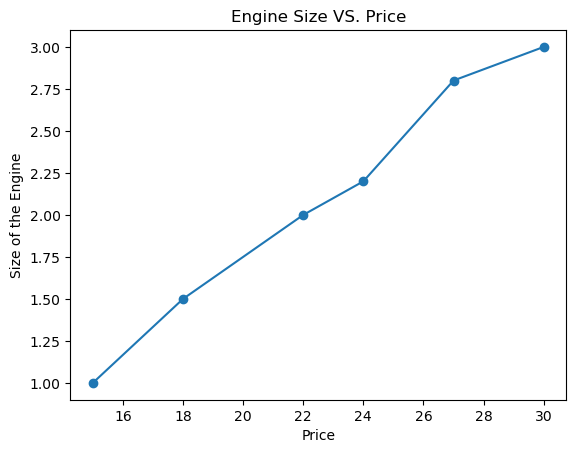

In [8]:
plt.title("Engine Size VS. Price")
plt.ylabel("Size of the Engine")
plt.xlabel ("Price")
plt.plot(Price, Engine_size , marker = 'o')

In [43]:
model = LinearRegression()
Price = Price.reshape(-1 , 1)
model.fit(Price , Engine_size)
weight = model.coef_[0]
bias = model.intercept_


def cost_function (Price , Engine_size , weight , bias ):
    iteration = len(Engine_size)
    total_error = 0
    for i in range(iteration): 
        Price_i = Price[i][0]
        y_predicted = weight*Price_i + bias
        Error = y_predicted -  Engine_size[i]
        total_error = total_error + Error**2
   
    Price = total_error/ 2*iteration 
    return Price


def gradient_calculation(Price , Engine_size , weight , bias):
    iteration = len(Engine_size)
    error = 0
    dj_dw = 0
    dj_db = 0 
    for i in range (iteration):
        price_i = Price[i][0]
        y_predicted = weight*price_i + bias
        error = y_predicted - Engine_size[i]
        dj_dw = dj_dw + error* price_i
        dj_db = dj_db + error
        
    return dj_dw/2 , dj_db/2

learning_rate = 0.001
iteration = 10000
Weight_intitial = 0 
Bias_intitial = 0

def gradient_decent(Price ,Engine_size, Weight_intitial , Bias_intitial , learning_rate , iteration):
    weight = Weight_intitial
    bias = Bias_intitial
    for i in range (iteration):
        dj_dw , dj_db = gradient_calculation(Price , Engine_size , weight , bias)
        weight = weight - learning_rate*dj_dw
        bias = bias - learning_rate*dj_db
        if i%100 == 0 :
            function = cost_function (Price , Engine_size , weight , bias )
            print (f"iteration{i}:Price = {function:.4f} ,Engine_size = {function:.4f} weight={function:.4f} , bias={function:.4f}")
        
    return weight, bias 
        

final_weight, final_bias = gradient_decent(Price ,Engine_size, Weight_intitial , Bias_intitial , learning_rate , iteration)
print(f"\nFinal parameters: weight = {final_weight:.4f}, bias = {final_bias:.4f}")


iteration0:Price = 34.1433 ,Engine_size = 34.1433 weight=34.1433 , bias=34.1433
iteration100:Price = 0.9236 ,Engine_size = 0.9236 weight=0.9236 , bias=0.9236
iteration200:Price = 0.9001 ,Engine_size = 0.9001 weight=0.9001 , bias=0.9001
iteration300:Price = 0.8773 ,Engine_size = 0.8773 weight=0.8773 , bias=0.8773
iteration400:Price = 0.8551 ,Engine_size = 0.8551 weight=0.8551 , bias=0.8551
iteration500:Price = 0.8335 ,Engine_size = 0.8335 weight=0.8335 , bias=0.8335
iteration600:Price = 0.8125 ,Engine_size = 0.8125 weight=0.8125 , bias=0.8125
iteration700:Price = 0.7922 ,Engine_size = 0.7922 weight=0.7922 , bias=0.7922
iteration800:Price = 0.7724 ,Engine_size = 0.7724 weight=0.7724 , bias=0.7724
iteration900:Price = 0.7532 ,Engine_size = 0.7532 weight=0.7532 , bias=0.7532
iteration1000:Price = 0.7345 ,Engine_size = 0.7345 weight=0.7345 , bias=0.7345
iteration1100:Price = 0.7163 ,Engine_size = 0.7163 weight=0.7163 , bias=0.7163
iteration1200:Price = 0.6987 ,Engine_size = 0.6987 weight=0.

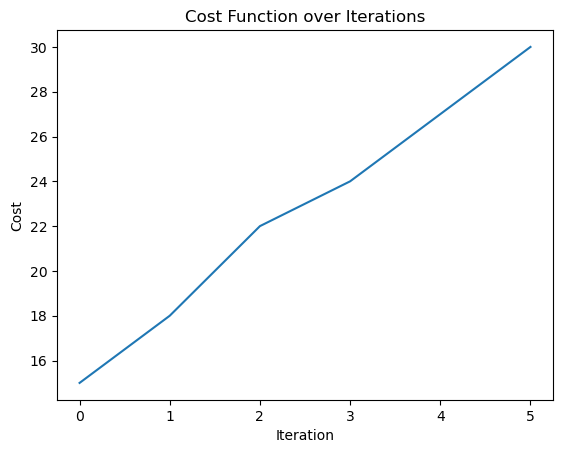

In [47]:
plt.plot(Price)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.show()

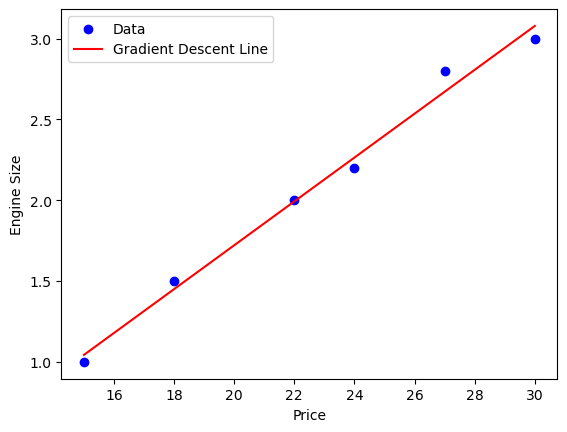

2711.4555793991426


In [51]:
plt.scatter(Price, Engine_size, color='blue', label='Data')
predicted = weight * Price + bias  # from your gradient descent
plt.plot(Price, predicted, color='red', label='Gradient Descent Line')
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.legend()
plt.show()
def predict(price):
    return weight * price + bias

print(predict(20000))